# Will You Get a Job or Not ?

# Welcome To This Notebook
1. I tried my best to explain every tiny details in this notebook in between as I can.
2. I have compared all famous machine learning models in data modelling section to find the best model as I can :)
3. Don't Forget to Upvote this Notebook, If you really liked it :) and that encourage me to upload more interesting notebooks like this in the future.

# Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve, classification_report, confusion_matrix, roc_auc_score

### Optional Settings

In [2]:
# %matplotlib inline

In [3]:
# plt.rcdefaults()
# sns.set_style()

In [4]:
# plt.rc("figure", figsize=[9, 5])
# plt.style.use("seaborn")
# sns.set(rc={"figure.figsize": [9, 5]})

# Let's Look at the Data

In [5]:
data = pd.read_csv("../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
data.drop(labels=["sl_no"], axis=1, inplace=True)

### Take a Sneak Peek :)

In [6]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
data.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

###### The data types of the attributes are in the right form 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


###### As you can see, among 14 attributes (columns) there exist one attribute with 67 (215 - 67 = 148) missing values :(

### Optional

In [9]:
data.isna().sum().sort_values(ascending=False)

salary            67
status             0
mba_p              0
specialisation     0
etest_p            0
workex             0
degree_t           0
degree_p           0
hsc_s              0
hsc_b              0
hsc_p              0
ssc_b              0
ssc_p              0
gender             0
dtype: int64

In [10]:
data.loc[data["salary"].isna(), :]    # You can also use this code :) -->  data[data["salary"].isna()]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


# Descriptive Analysis - Numeric Data

In [11]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Exploratory Data Analysis

### Class Imbalance Check !

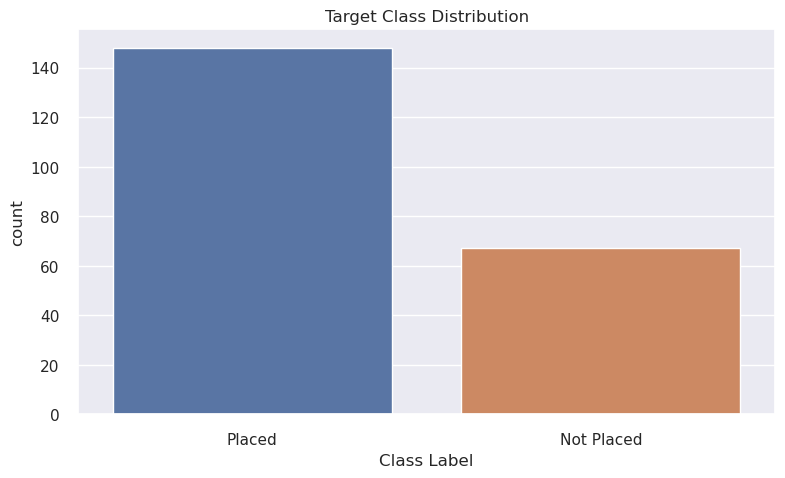

In [12]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(x="status", data=data, ax=ax)
plt.title("Target Class Distribution")
plt.xlabel("Class Label")
plt.show()

###### It says 148 (69%) people have been placed and 67 (31%) people have not placed. It concludes that our dataset is imbalanced but not that much :(

### Does Gender Impacts Placement ?

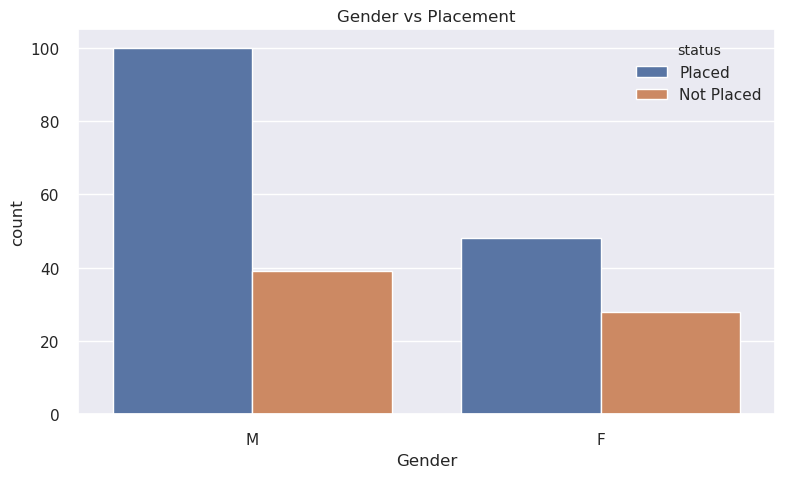

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(x="gender", hue="status", data=data, ax=ax)
plt.xlabel("Gender")
plt.title("Gender vs Placement")
plt.show()

###### The answer is Yes. Because more number of male have been placed than female. But when it comes to not placed people, it's not that much difference.  If you think it is unfair, feel free to post your opinion in the comment section.

### Do Specialisation Matters ?

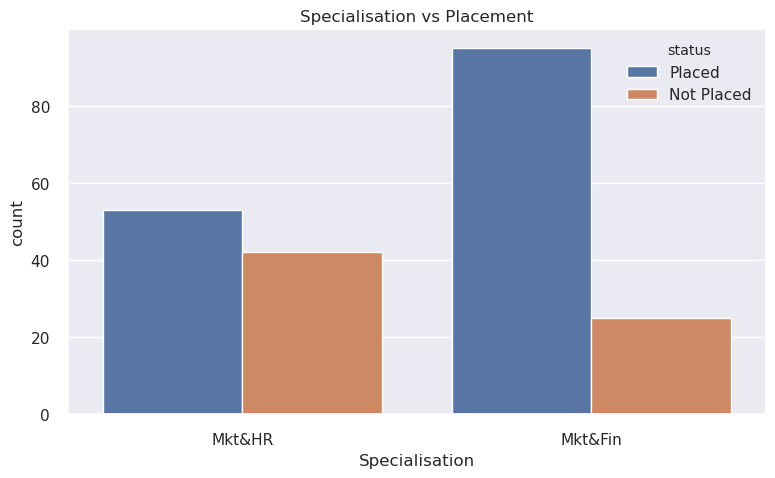

In [14]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(x="specialisation", hue="status", data=data, ax=ax)
plt.xlabel("Specialisation")
plt.title("Specialisation vs Placement")
plt.show()

###### The chances of getting placed for students who have taken "Mkt&Fin" specialisation is more than the students with "Mkt&HR" specialisation. But don't worry 53 (36 %) out of 148 placed students are from "Mkt&HR" :)

### Do Work Experience Helps You Get Placed ?

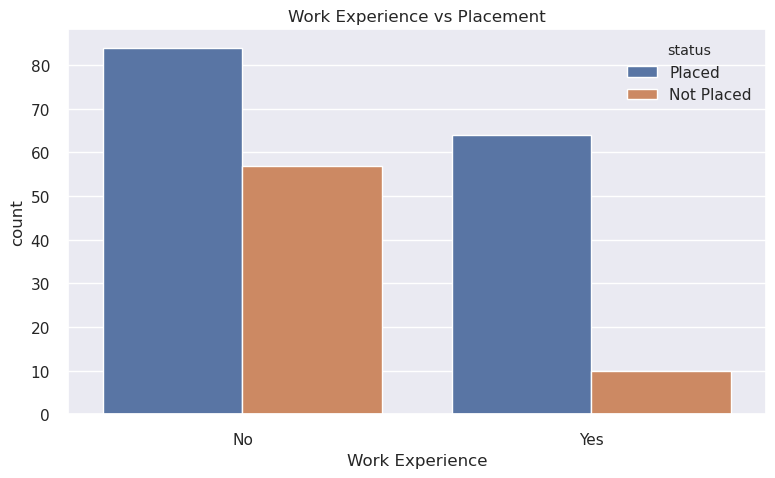

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(x="workex", hue="status", data=data, ax=ax)
plt.xlabel("Work Experience")
plt.title("Work Experience vs Placement")
plt.show()

###### Really it looks weird but you gotta accept that. If you are a student, mostly you might have heard from your professor or some other saying that "work experience through internship or any peoject really helps you to get placed". But here you can see that most of students who have been placed are not having any work experience :(

### Which Degree has More Placements ?

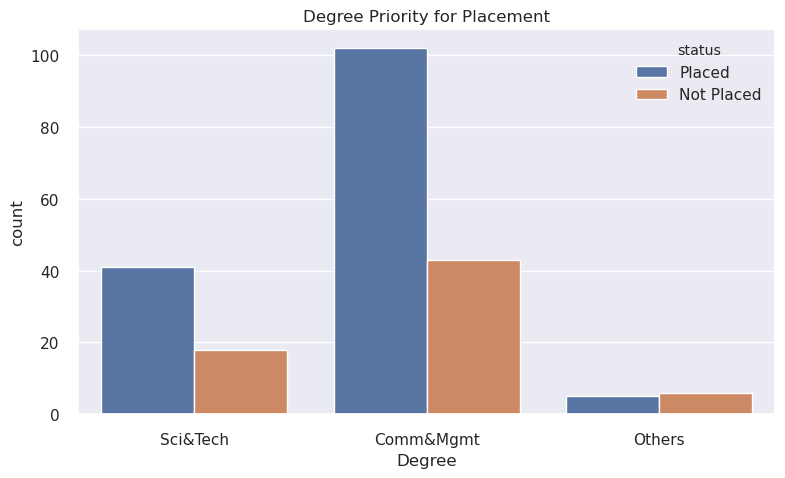

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(x="degree_t", hue="status", data=data, ax=ax)
plt.title("Degree Priority for Placement")
plt.xlabel("Degree")
plt.show()

###### The "Comm&Mgmt" degree has more priority for recruiters to recruit. But they also need some "Sci&Tech" students than "Others" category students which is good sign for Science and Technology students :)

### Does Board of Education Matters ?

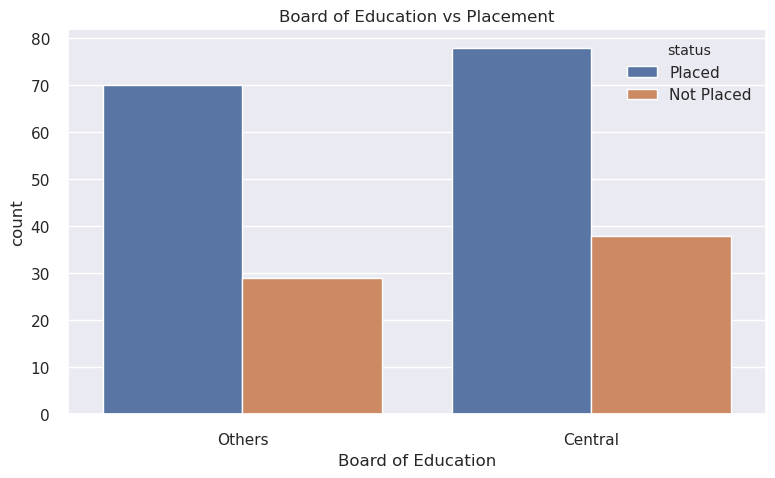

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(x="ssc_b", hue="status", data=data, ax=ax)
plt.title("Board of Education vs Placement")
plt.xlabel("Board of Education")
plt.show()

###### Looks like both board of education is having more equal (same but not exactly) chances of getting placed :)

### Do Higher Secondary Group matters ?

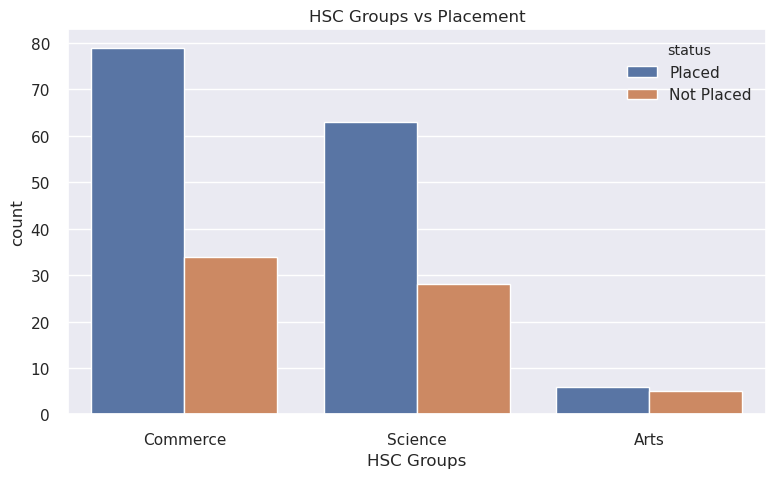

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(x="hsc_s", hue="status", data=data, ax=ax)
plt.xlabel("HSC Groups")
plt.title("HSC Groups vs Placement")
plt.show()

###### I guess the recruiters are mostly choosing "Commerce" students because in the above "Degree Priority" Chart, the recruiters were mostly selected the students who have completed "Comm&Mgmt" degree. But don't worry, they have also recruited more "Science" group students which is a good sign for me :)

### Do Employability Test Helps Getting Job?

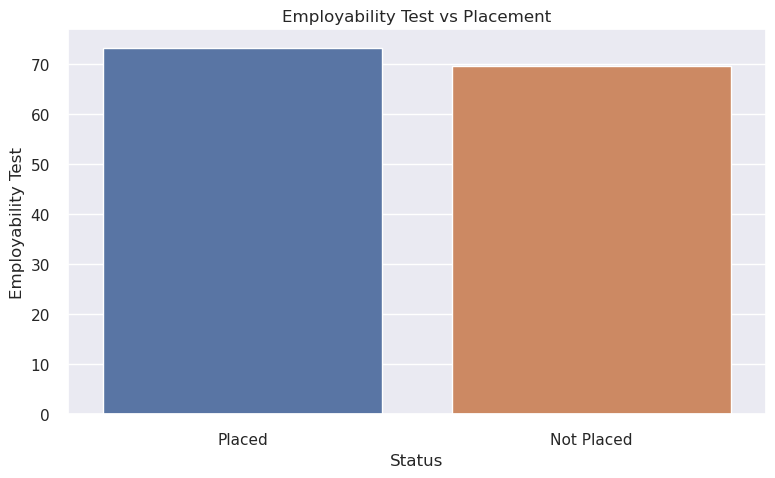

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x="status", y="etest_p", data=data, ax=ax, ci=None)
plt.title("Employability Test vs Placement")
plt.xlabel("Status")
plt.ylabel("Employability Test")
plt.show()

###### Again you can't be confident if you have taken Employability Test to get placed :(

### Do High Percentage Holders Got Placed More Than Low Percentage Holders ?

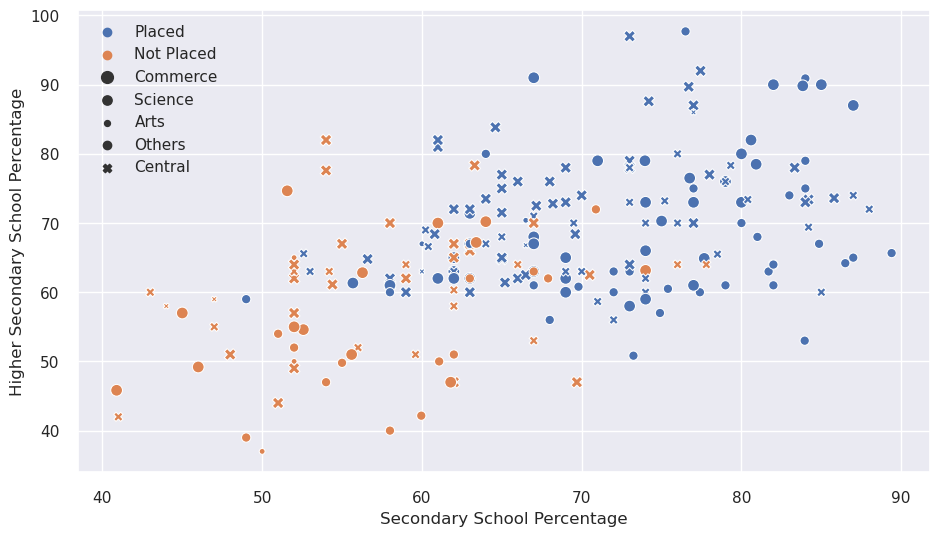

In [20]:
fig = plt.figure(figsize=[11, 6])
ax = fig.add_subplot()

sns.scatterplot(x="ssc_p", y="hsc_p", hue=data["status"].tolist(),
                style=data["ssc_b"].tolist(), size=data["hsc_s"].tolist(), data=data, ci=None, ax=ax)
plt.xlabel("Secondary School Percentage")
plt.ylabel("Higher Secondary School Percentage")
plt.show()

###### Now it is clear that students who have scored more than 60% in both secondary and higher secondary and have chosen commerce as their group in higher secondary have been placed more than the other students :)

Note:
1. Here we are only concerned about predicting whether a student will get placed or not which is a classification problem in our case.
2. That's why I haven't included salary attribute (column) in EDA.
3. However If you are interested in predicting the salary of placed and not placed student you can take it as a homework :)

# Feature Engineering

### Categorical Data Encoding

In [21]:
categorical_variables = data.select_dtypes(include="object").columns.tolist()

treat_not_as_same = ["degree_t", "hsc_s"]

treat_as_same = [var for var in categorical_variables if not var in treat_not_as_same]

###### Why I'm treating "degree_t" and "hsc_s" as not same ? The answer is, they are not like all categorical variable they need some order to arange them which is nothing but one degree is bigger or smaller than the other or it has higher value than the others. For example Sci&Tech > Comm&Mgmt > Others

In [22]:
for var in treat_as_same[:-1]:
    dict_to_map = {j:i for i, j in enumerate(data[var].unique())}
    data[var] = data[var].map(dict_to_map)

data["status"] = data["status"].map({"Not Placed": 0, "Placed": 1})

In [23]:
for var in treat_not_as_same:
    data = pd.concat(objs=[data, pd.get_dummies(data=data[var])], axis=1)
    data.drop(labels=var, axis=1, inplace=True)
    
data.drop(labels="salary", axis=1, inplace=True)

### Feature Selection

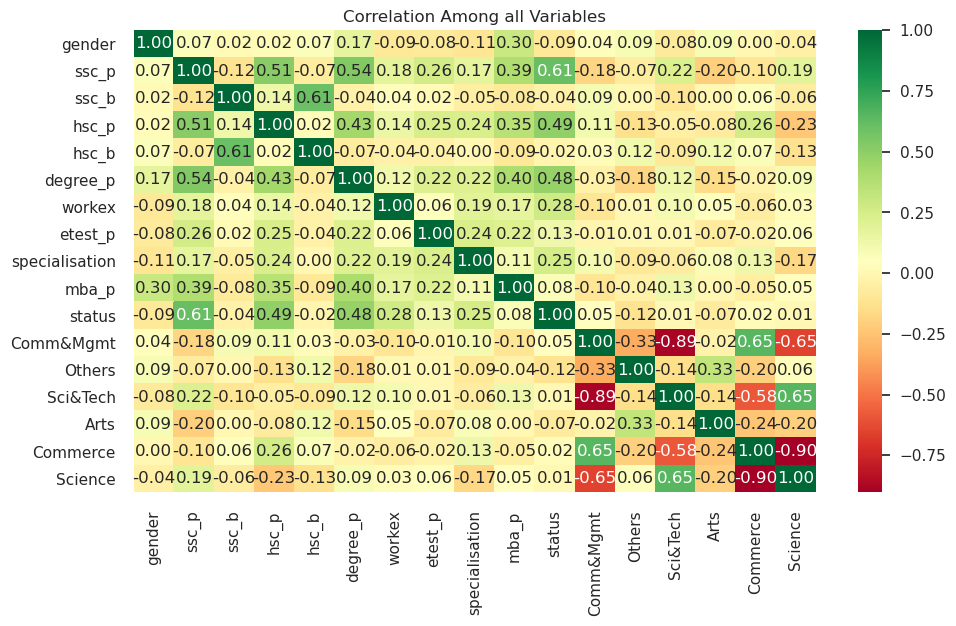

In [24]:
fig = plt.figure(figsize=[11, 6])
ax = fig.add_subplot()

sns.heatmap(data=data.corr(), cmap="RdYlGn", annot=True, fmt=".2f", ax=ax)
plt.title("Correlation Among all Variables")
plt.show()

###### As you can see there are some negative and positive correlations among one hot encoded variables.

In [25]:
X = data.drop(labels="status", axis=1).values
y = data["status"].values

# Model Cross Validation

Note:
1. I'm doing Cross Validation before building the model because I want to know which algorithm is giving good result.
2. So that I can give more effort to that model to get best result as I can :)

In [26]:
models = [("Logistic Regression", LogisticRegression(random_state=0, n_jobs=-1)),
         ("Linear SVM", SVC(kernel="linear", random_state=0)),
         ("RBF SVM", SVC(kernel="rbf", random_state=0)),
         ("Decision Tree", DecisionTreeClassifier(random_state=0)),
         ("Random Forest", RandomForestClassifier(n_jobs=-1, random_state=0)),
         ("Adaboost RF", AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1, random_state=0), random_state=0, learning_rate=0.1)),
         ("Adaboost DT", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0), learning_rate=0.1)),
         ("Gradient Boosting", GradientBoostingClassifier(random_state=0))]

In [27]:
stratified = StratifiedKFold()
model_details = {name: [] for name, _ in models}

for train_index, test_index in stratified.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for name, model in models:
        if name in ["Logistic Regression", "Linear SVM", "RBF SVM"]:
            std = StandardScaler()
            X_train = std.fit_transform(X_train)
            X_test = std.transform(X_test)

        model.fit(X_train, y_train)
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        model_details[name].append((train_accuracy, test_accuracy))

In [28]:
summary_df = pd.DataFrame(index=["Train Score", "Test Score"])

for model, accuracy in zip(model_details.keys(), model_details.values()):
    train_accuracy = [train_accuracy for train_accuracy, _ in accuracy]
    test_accuracy = [test_accuracy for _, test_accuracy in accuracy]
    summary_df[model] = [np.mean(train_accuracy), np.mean(test_accuracy)]

In [29]:
summary_df.T

,Train Score,Test Score
Logistic Regression,0.896512,0.851163
Linear SVM,0.903488,0.865116
RBF SVM,0.941860,0.865116
Decision Tree,1.000000,0.781395
Random Forest,1.000000,0.846512
Adaboost RF,1.000000,0.860465
Adaboost DT,1.000000,0.762791
Gradient Boosting,1.000000,0.823256


###### From the above model we can conclude that the Support Vector Machine is doing better than the other models with "RBF" kernel. Note we can't stop right here by getting good accuracy, we need to evaluate our model using other metrics too.

## Logistic Regression

Note:
1. You can also use train_test_split here to get train and test dataset.
2. But why I'm using StratifiedShuffleSplit here ?
3. The answer is that our dataset is somehow imbalanced not fully and this ensure that our train and test will be more representive of both classes.

In [30]:
stratified_split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [31]:
std = StandardScaler()
scaled_train = std.fit_transform(X_train)
scaled_test = std.transform(X_test)

In [32]:
logistic = LogisticRegression(random_state=0, n_jobs=-1)
logistic.fit(scaled_train, y_train)
print("Logistic Regression Test Score :", logistic.score(scaled_test, y_test))

Logistic Regression Test Score : 0.813953488372093


### Confusion Matrix

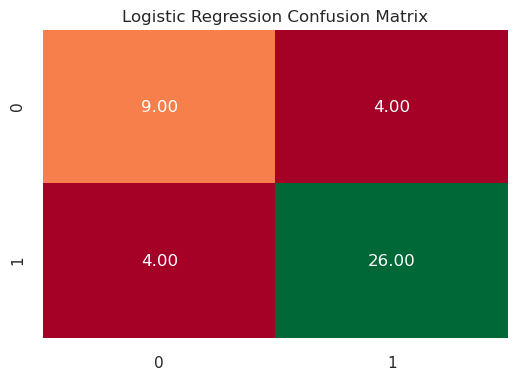

In [33]:
con_mat = pd.DataFrame(confusion_matrix(y_test, logistic.predict(scaled_test)))
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()

sns.heatmap(con_mat, annot=True, fmt=".2f", cmap="RdYlGn", cbar=False, ax=ax)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

###### Logistic Regression has proved to be a good classifier. However we have 4 False Positive (classified students who are not eligible for placement as eligible) and 4 False Negative (classified students who are eligible for placement as not eligible). But don't worry we will try to reduce this Type 1 and Type 2 error :)

###### Note: In this problem we have to reduce False Negatives more than False Positives because we can't miss any student who is eligible for placement but our model predicted as not eligible :(

### ROC Curve

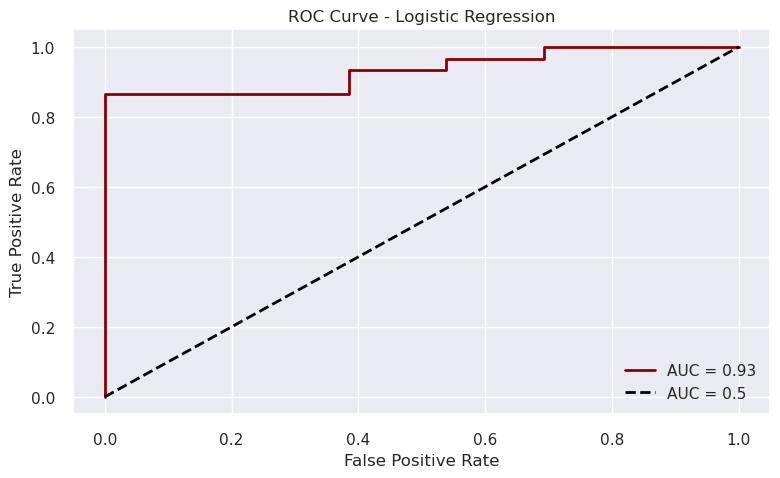

In [34]:
fpr, tpr, thresshold = roc_curve(y_test, logistic.predict_proba(scaled_test)[:, 1])
auc_score = auc(fpr, tpr)

fig = plt.figure(figsize=[9, 5])
ax = fig.add_subplot()

plt.plot(fpr, tpr, c="darkred", lw=2, label="AUC = {}".format(round(auc_score, 2)))
plt.plot([0, 1], [0, 1], c='black', lw=2, ls='--', label="AUC = {}".format(0.5))
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

### Hyperparameter Tuning 

In [35]:
C = [100, 10, 1.0, 0.1, 0.01]
penalty = ['l2', 'l1']
param = {"C": C, "penalty": penalty}

grid = GridSearchCV(estimator=LogisticRegression(random_state=0, n_jobs=-1), param_grid=param, n_jobs=-1)
grid.fit(scaled_train, y_train)

grid_model = grid.estimator.fit(scaled_train, y_train)
test_score = grid_model.score(scaled_test, y_test)
print("Tuned Logistic Regression Test Score :", test_score)

Tuned Logistic Regression Test Score : 0.813953488372093


### Classification Report

In [36]:
print(classification_report(y_test, grid_model.predict(scaled_test)))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.87      0.87      0.87        30

    accuracy                           0.81        43
   macro avg       0.78      0.78      0.78        43
weighted avg       0.81      0.81      0.81        43



###### After doing hyperparameter tuning, the model is producing the same accuracy as we got before without tuning parameter.

## Support Vector Machine

In [37]:
svc = SVC(kernel="rbf", random_state=0, probability=True)
svc.fit(scaled_train, y_train)
print("SVM Test Score :", svc.score(scaled_test, y_test))

SVM Test Score : 0.8372093023255814


### Confusion Matrix

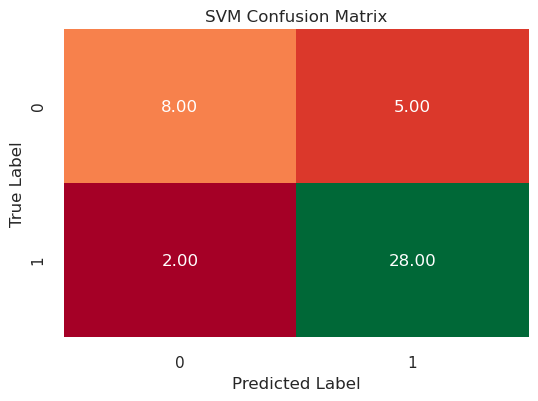

In [38]:
con_mat = pd.DataFrame(confusion_matrix(y_test, svc.predict(scaled_test)))
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()

sns.heatmap(con_mat, annot=True, fmt=".2f", cmap="RdYlGn", cbar=False, ax=ax)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###### Wow, our SVM model has reduced the False Positive count to 1 which is pretty amazing :)

### ROC Curve

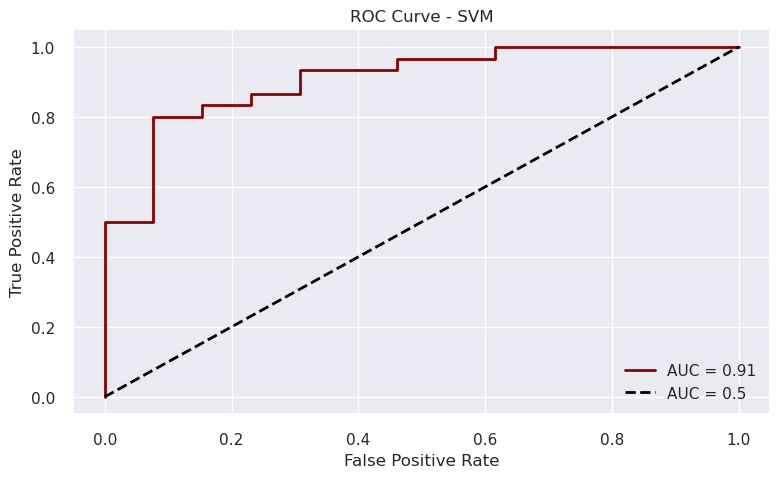

In [39]:
fpr, tpr, thresshold = roc_curve(y_test, svc.predict_proba(scaled_test)[:, 1])
auc_score = auc(fpr, tpr)

fig = plt.figure(figsize=[9, 5])
ax = fig.add_subplot()

plt.plot(fpr, tpr, c="darkred", lw=2, label="AUC = {}".format(round(auc_score, 2)))
plt.plot([0, 1], [0, 1], c='black', lw=2, ls='--', label="AUC = {}".format(0.5))
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

### Hyperparameter Tuning

In [40]:
C = [100, 10, 1.0, 0.1, 0.01]
kernel = ["linear", "RBF", "poly"]
param = {"C": C, "kernel":kernel}

grid = GridSearchCV(estimator=SVC(random_state=0), param_grid=param, n_jobs=-1)
grid.fit(scaled_train, y_train)

grid_model = grid.estimator.fit(scaled_train, y_train)
test_score = grid_model.score(scaled_test, y_test)
print("Tuned SVM Test Score :", test_score)

Tuned SVM Test Score : 0.8372093023255814


### Classification Report

In [41]:
print(classification_report(y_test, grid_model.predict(scaled_test)))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43



## Decision Tree

In [42]:
dec = DecisionTreeClassifier(random_state=0)
dec.fit(X_train, y_train)
print("Decision Tree Classifier Test Score :", dec.score(X_test, y_test))

Decision Tree Classifier Test Score : 0.8837209302325582


### Confusion Matrix

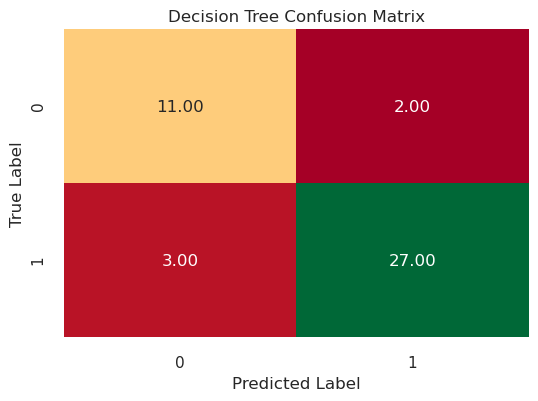

In [43]:
con_mat = pd.DataFrame(confusion_matrix(y_test, dec.predict(X_test)))
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()

sns.heatmap(con_mat, annot=True, fmt=".2f", cmap="RdYlGn", cbar=False, ax=ax)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###### More or less but same as Logistic Regression performance :( Because Decision Trees are more likely to overfit to training data. So we need to tune it's parameter

### ROC Curve

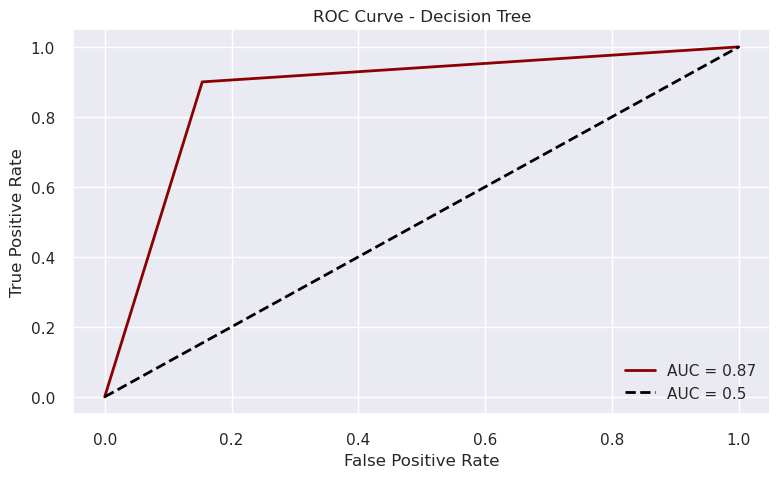

In [44]:
fpr, tpr, thresshold = roc_curve(y_test, dec.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)

fig = plt.figure(figsize=[9, 5])
ax = fig.add_subplot()

plt.plot(fpr, tpr, c="darkred", lw=2, label="AUC = {}".format(round(auc_score, 2)))
plt.plot([0, 1], [0, 1], c='black', lw=2, ls='--', label="AUC = {}".format(0.5))
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

### Hyperparameter Tuning

In [45]:
depth = list(range(1, 11))
min_sample_split = np.arange(5, 30, 5)
min_leaf_sample = np.arange(3, 16, 3)
features = ["auto", "sqrt", "log2"]
max_leaf_nodes = [4, 6, 8, 10]
param = {"max_depth": depth, "min_samples_split": min_sample_split, "min_samples_leaf": min_leaf_sample,
         "max_features": features, "max_leaf_nodes": max_leaf_nodes}

grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=param, n_jobs=-1)
grid.fit(X_train, y_train)

grid_model = grid.estimator.fit(X_train, y_train)
test_score = grid_model.score(X_test, y_test)
print("Tuned Decision Tree Test Score :", test_score)

Tuned Decision Tree Test Score : 0.8837209302325582


###### Always don't trust too much on Decision Trees but try to trust it using Random Forest and Boosting models.

### Classification Report

In [46]:
print(classification_report(y_test, grid_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.93      0.90      0.92        30

    accuracy                           0.88        43
   macro avg       0.86      0.87      0.87        43
weighted avg       0.89      0.88      0.88        43



## Random Forest

In [47]:
ran = RandomForestClassifier(random_state=0)
ran.fit(X_train, y_train)
print("Random Forest Classifier Test Score :", ran.score(X_test, y_test))

Random Forest Classifier Test Score : 0.8837209302325582


### Confusion Matrix

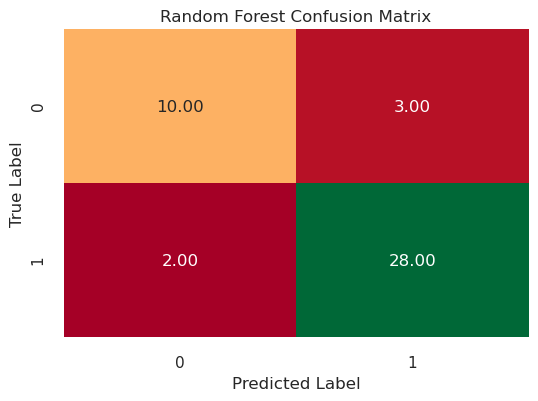

In [48]:
con_mat = pd.DataFrame(confusion_matrix(y_test, ran.predict(X_test)))
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()

sns.heatmap(con_mat, annot=True, fmt=".2f", cmap="RdYlGn", cbar=False, ax=ax)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###### That's the power of Random Forest :)  It proved to be a good classifier than SVM in our case. SVM has 7 False Positives but Random Forest has only 3 and False Negatives also good when compared overall :)

### ROC Curve

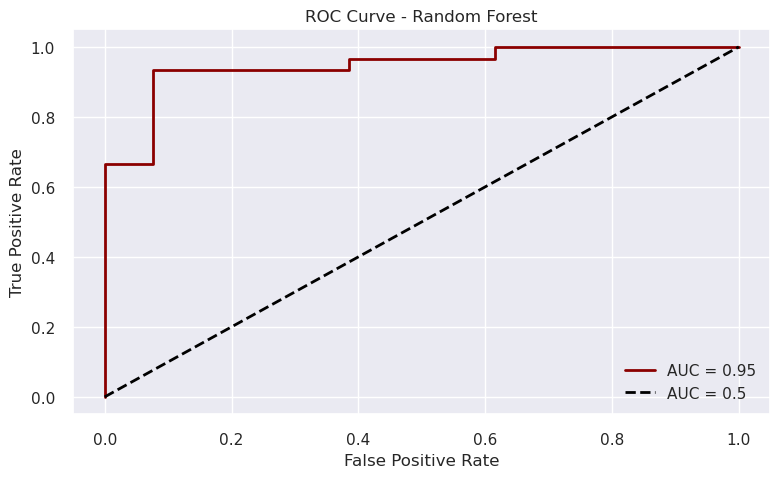

In [49]:
fpr, tpr, thresshold = roc_curve(y_test, ran.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)

fig = plt.figure(figsize=[9, 5])
ax = fig.add_subplot()

plt.plot(fpr, tpr, c="darkred", lw=2, label="AUC = {}".format(round(auc_score, 2)))
plt.plot([0, 1], [0, 1], c='black', lw=2, ls='--', label="AUC = {}".format(0.5))
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

###### Yes, AUC for Random Forest is 95 :) That's great isn't it !

### Hyperparameter Tuning

In [50]:
n_estimators = np.arange(100, 140, 10)
max_depth = np.arange(3, 10, 2)
max_features = ["auto", "sqrt"]
max_leaf_nodes = np.arange(3, 10, 2)
param = {"n_estimators": n_estimators, "max_depth": max_depth, "max_features": max_features, "max_leaf_nodes": max_leaf_nodes}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0, n_jobs=-1), param_grid=param, n_jobs=-1)
grid.fit(X_train, y_train)

grid_model = grid.estimator.fit(X_train, y_train)
test_score = grid_model.score(X_test, y_test)
print("Tuned Random Forest Test Score :", test_score)

Tuned Random Forest Test Score : 0.8837209302325582


AUC afetr parameter tuning :  0.9461538461538462


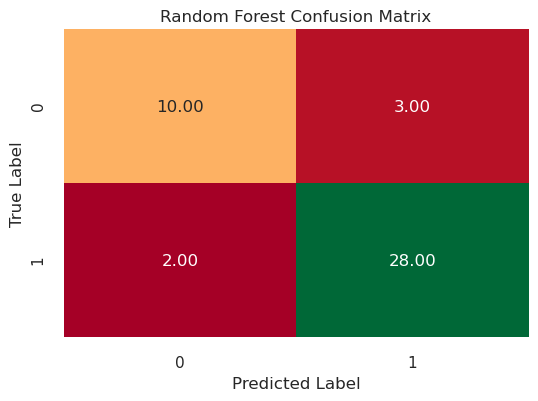

In [51]:
print("AUC afetr parameter tuning : ", roc_auc_score(y_test, grid_model.predict_proba(X_test)[:, 1]))

#confusion matrix
con_mat = pd.DataFrame(confusion_matrix(y_test, grid_model.predict(X_test)))
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()

sns.heatmap(con_mat, annot=True, fmt=".2f", cmap="RdYlGn", cbar=False, ax=ax)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Classification Report

In [52]:
print(classification_report(y_test, grid_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



###### Don't worry it's doing same as before :)

## AdaBoost Classifier

In [53]:
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0, n_jobs=-1), learning_rate=0.1, random_state=0)
ada.fit(X_train, y_train)
print("AdaBoost Classifier Test Score :", ada.score(X_test, y_test))

AdaBoost Classifier Test Score : 0.8837209302325582


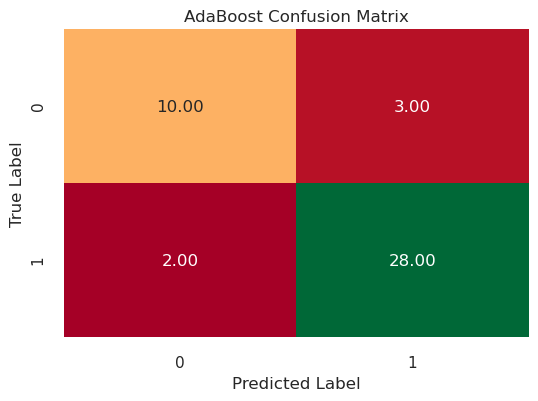

In [54]:
con_mat = pd.DataFrame(confusion_matrix(y_test, ada.predict(X_test)))
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()

sns.heatmap(con_mat, annot=True, fmt=".2f", cmap="RdYlGn", cbar=False, ax=ax)
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

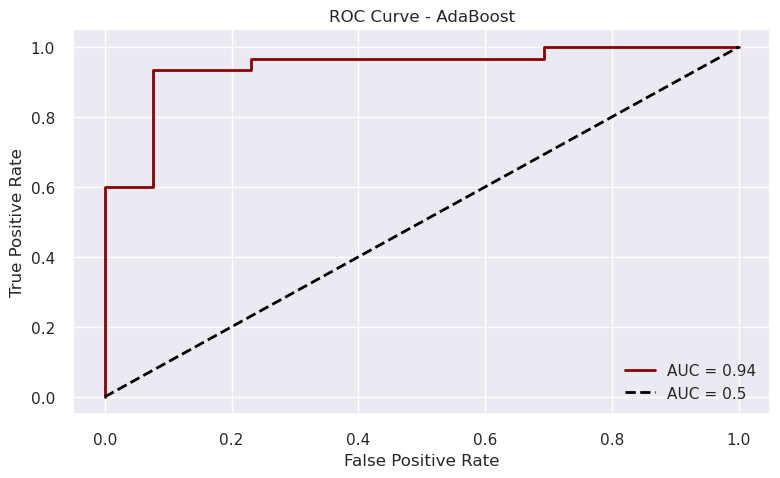

In [55]:
fpr, tpr, thresshold = roc_curve(y_test, ada.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)

fig = plt.figure(figsize=[9, 5])
ax = fig.add_subplot()

plt.plot(fpr, tpr, c="darkred", lw=2, label="AUC = {}".format(round(auc_score, 2)))
plt.plot([0, 1], [0, 1], c='black', lw=2, ls='--', label="AUC = {}".format(0.5))
plt.title("ROC Curve - AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

###### When comparing Random Forest with AdaBoost, I recommend to use Random Forest than AdaBoost :)

### Classification Report

In [56]:
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



## GradientBoosting

In [57]:
grad = GradientBoostingClassifier(learning_rate=0.1, random_state=0)
grad.fit(X_train, y_train)
print("GradientBoost Classifier Test Score :", grad.score(X_test, y_test))

GradientBoost Classifier Test Score : 0.8604651162790697


### Confusion Matrix

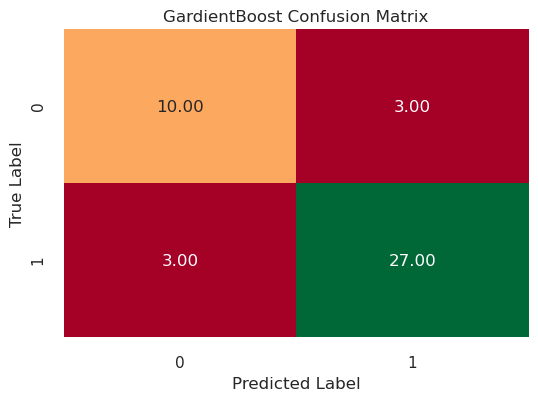

In [58]:
con_mat = pd.DataFrame(confusion_matrix(y_test, grad.predict(X_test)))
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()

sns.heatmap(con_mat, annot=True, fmt=".2f", cmap="RdYlGn", cbar=False, ax=ax)
plt.title("GardientBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###### Again I recommend Random Forest :)

### Classification Report

In [59]:
print(classification_report(y_test, grad.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



## Votting Classifier

In [60]:
estimators = [("LR", LogisticRegression(random_state=0, n_jobs=-1)),
             ("SVC", SVC(random_state=0)),
             ("RF", RandomForestClassifier(random_state=0, n_jobs=-1)),
             ("Ada", AdaBoostClassifier(RandomForestClassifier(random_state=0, n_jobs=-1), learning_rate=0.1, random_state=0)),
             ("Dec", DecisionTreeClassifier(random_state=0))]
vot = VotingClassifier(estimators, n_jobs=-1)
vot.fit(X_train, y_train)
print("Votting Classifier Test Score :", vot.score(X_test, y_test))

Votting Classifier Test Score : 0.8837209302325582


### Confusion Matrix

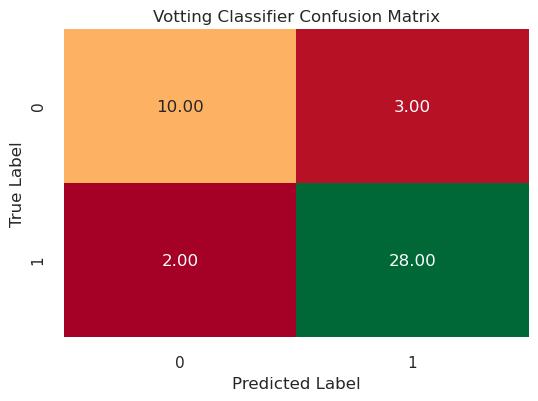

In [61]:
con_mat = pd.DataFrame(confusion_matrix(y_test, vot.predict(X_test)))
fig = plt.figure(figsize=[6, 4])
ax = fig.add_subplot()

sns.heatmap(con_mat, annot=True, fmt=".2f", cmap="RdYlGn", cbar=False, ax=ax)
plt.title("Votting Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Classification Report

In [62]:
print(classification_report(y_test, vot.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



###### Again Random Forest is good

# Conclusion :)
1. From the mdoels we have built, Random Forest is doing better than the other models.
2. You can also use Votting Classifier to predict the same as than Random Forest :(
3. You can also use SVM other than Ensemble models.
4. It is possible to select important categorical features using Chi-Square test but I have not implemented here.